In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('churn_modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
data.drop(['RowNumber','Surname','CustomerId'],axis=1,inplace=True)

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [24]:
data[data['Tenure'] == 1]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
54,601,Germany,Male,42,1,98495.72,1,1,0,40014.76,1
55,619,France,Male,43,1,125211.92,1,1,1,113410.49,0
...,...,...,...,...,...,...,...,...,...,...,...
9948,724,Germany,Female,53,1,139687.66,2,1,1,12913.92,0
9957,633,France,Male,25,1,0.00,1,1,0,100598.98,0
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
9979,677,France,Female,58,1,90022.85,1,0,1,2988.28,0


# EDA 

In [54]:
categorical = data[['Geography','Gender','NumOfProducts','HasCrCard','Tenure','IsActiveMember','Exited']]
continuous = data[['CreditScore','Age','Balance','EstimatedSalary']]
plt.style.use('dark_background')

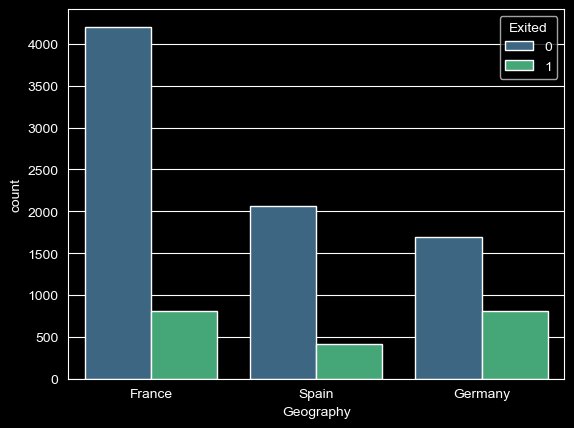

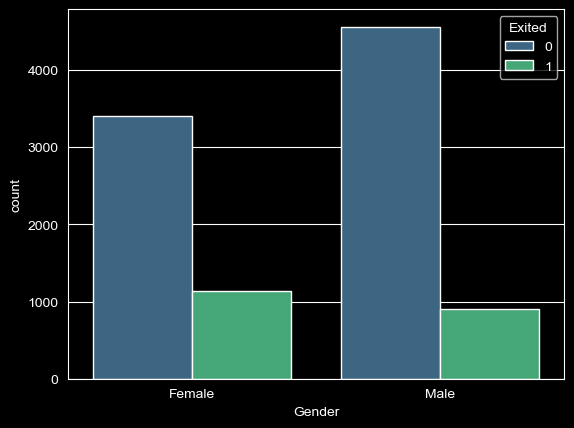

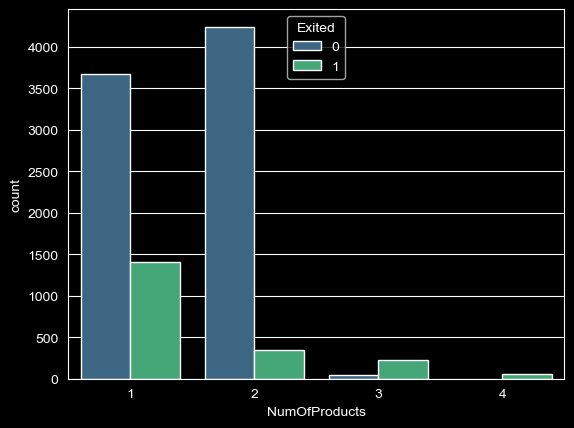

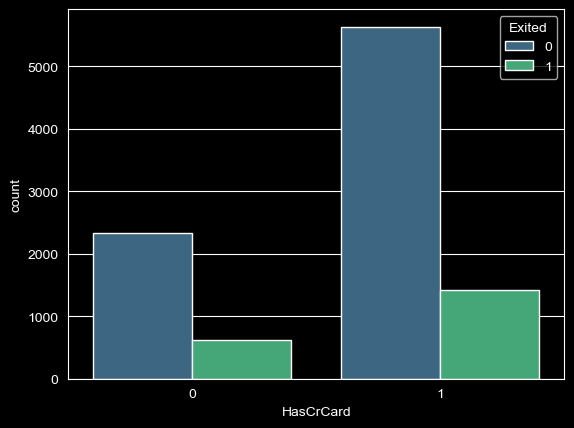

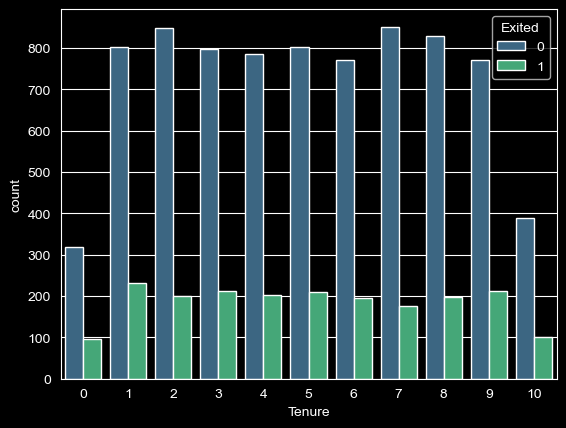

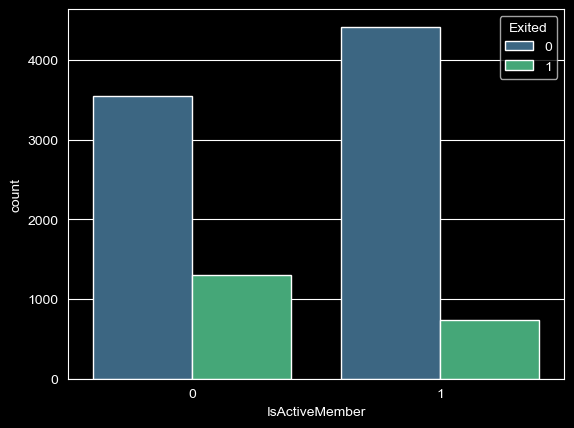

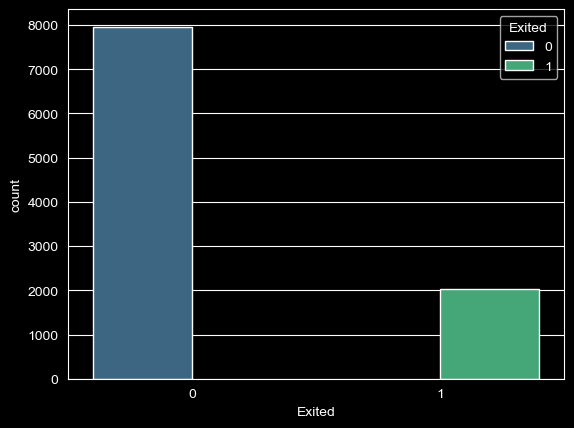

In [69]:
for i in categorical:
    plt.figure()
    sns.countplot(data=data,x=i,palette='viridis',hue='Exited')
    plt.show()

In [56]:
data.shape

(10000, 11)

In [57]:
data.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

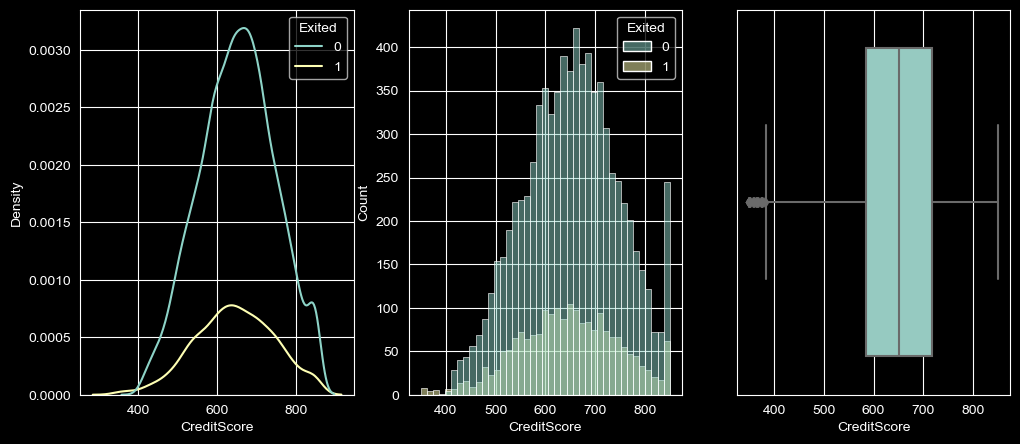

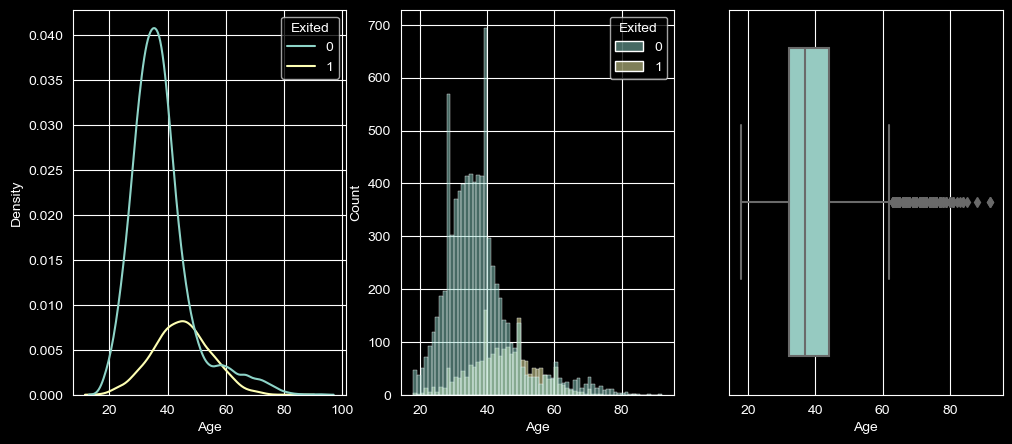

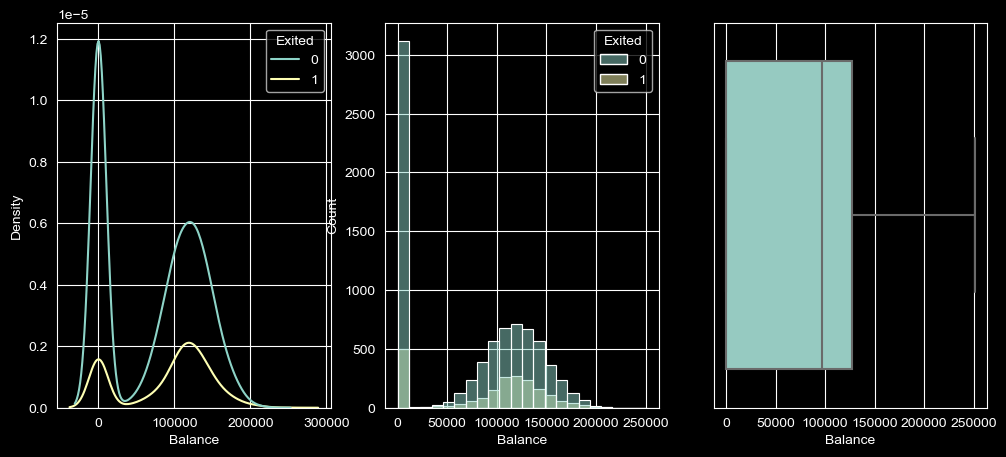

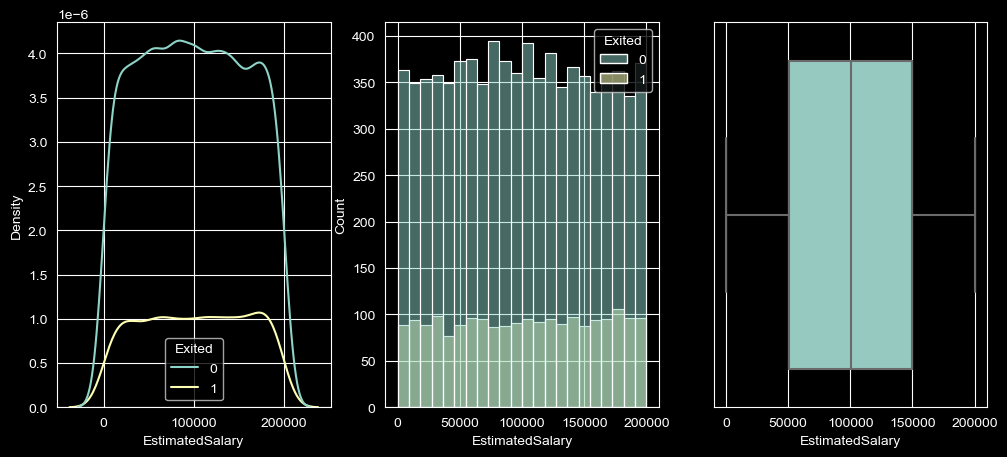

In [67]:
plt.style.use('dark_background')
for j in continuous:
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1)
    sns.kdeplot(data=data, x=j, hue='Exited',  color='green')
    plt.subplot(1,3,2)
    sns.histplot(data=data,x=j,color='violet',hue='Exited')
    plt.subplot(1,3,3)
    sns.boxplot(data=data,x=j,hue='Exited')
     

<AxesSubplot:>

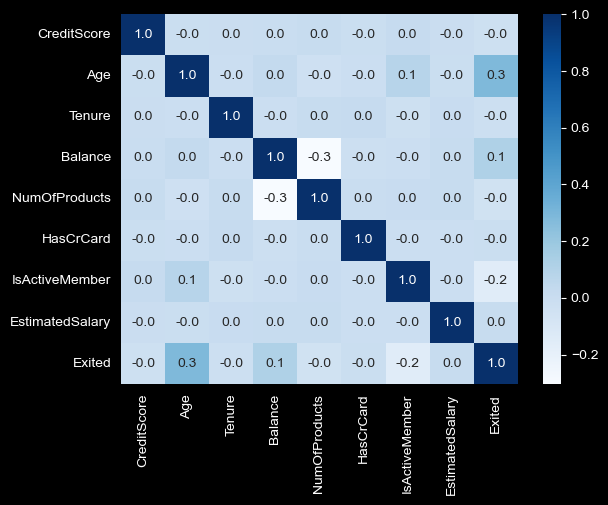

In [70]:
sns.heatmap(data.corr(),fmt='.1f',annot=True,cmap="Blues")

# LABEL ENCODING

In [76]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

for x in data.columns[data.dtypes==object]:
    data[x] = LabelEncoder().fit_transform(data[x])

In [77]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [78]:
x = data.drop(['Exited'],axis=1)
y = data['Exited']

In [79]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [80]:
print(x)

[[0.538      0.         0.         ... 1.         1.         0.50673489]
 [0.516      1.         0.         ... 0.         1.         0.56270874]
 [0.304      0.         0.         ... 1.         0.         0.56965435]
 ...
 [0.718      0.         0.         ... 0.         1.         0.21039009]
 [0.844      0.5        1.         ... 1.         0.         0.46442905]
 [0.884      0.         0.         ... 1.         0.         0.19091423]]


In [81]:
from sklearn.model_selection import train_test_split_test_split

In [82]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [104]:
xtrain.shape

(8000, 10)

In [105]:
model = Sequential()

model.add(Dense(units=6,activation='relu',input_dim=10))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation='tanh'))
model.add(Dense(units=1,activation='sigmoid'))


In [106]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 66        
                                                                 
 dense_11 (Dense)            (None, 64)                448       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2627 (10.26 KB)
Trainable params: 2627 (10.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=["accuracy"])

In [108]:
model.fit(xtrain,ytrain,batch_size=25,epochs=15)

Epoch 1/15
320/320 [==============================] - 1s 1ms/step - loss: 0.4994 - accuracy: 0.7811
Epoch 2/15
320/320 [==============================] - 0s 1ms/step - loss: 0.4655 - accuracy: 0.7991
Epoch 3/15
320/320 [==============================] - 0s 970us/step - loss: 0.4504 - accuracy: 0.8079
Epoch 4/15
320/320 [==============================] - 0s 992us/step - loss: 0.4428 - accuracy: 0.8121
Epoch 5/15
320/320 [==============================] - 0s 1ms/step - loss: 0.4352 - accuracy: 0.8177
Epoch 6/15
320/320 [==============================] - 0s 982us/step - loss: 0.4323 - accuracy: 0.8201
Epoch 7/15
320/320 [==============================] - 0s 992us/step - loss: 0.4268 - accuracy: 0.8241
Epoch 8/15
320/320 [==============================] - 0s 991us/step - loss: 0.4250 - accuracy: 0.8270
Epoch 9/15
320/320 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8255
Epoch 10/15
320/320 [==============================] - 0s 1ms/step - loss: 0.4124 - accura

In [109]:
out = model.predict(xtest)
out

63/63 [==============================] - 0s 1ms/step


array([[0.0925261 ],
       [0.03880173],
       [0.19173332],
       ...,
       [0.6293708 ],
       [0.05005391],
       [0.14617252]], dtype=float32)

In [100]:
y_pred = (out>0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [101]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,y_pred)

0.8595